## ОПРЕДЕЛЕНИЕ ВРЕМЕНИ ЗАДЕРЖИВАНИЯ В ХРОМАТОГРАФИИ ГИДРОФИЛЬНОГО ВЗАИМОДЕЙСТВИЯ (HILIC)
Хроматография - метод химического анализа, основанный на разделении веществ. Механизм хроматографии довольно трудный с точки зрения физики-химии вещества , но основными данными являются т.н. *времена задерживания. Вкратце, это время за которое вещество проходит через хроматографическую колонку за счёт т.н *подвижной фазы*. Подвижная фаза - это вещество, которое проходит сквозь колонку потоком с определнной скоростью. В нашем случае для каждого вещества из датасета подвижной фазой является одно и тоже вещество одинакого состава и скорости. 
Задача - обучить модель, которая могла бы могла предсказывать время задерживания для каждого вещества исходя из определённых *молекулярных дескрипторов*, от которых зависит то самое время задерживания, согласно различным теориям.

Первый шаг - загрузка датасета, где были указаны экспериментальные данные о времени задерживания. Данные уже предварительно были разделены на тестовую и тренировочную выборки.

In [1]:
import pandas as pd
import os
path = os.path.abspath("HILIC_dataset.xlsx")

df_train = pd.read_excel(path, sheet_name='Table_S1_Training_HILIC', skiprows=2, usecols= [0,1,2])
df_train.tail(9)


,NAME,SMILES,Experimental Retention Time
1014,Stachydrine,C[N+]1(CCCC1C(=O)[O-])C,7.10
1015,Stearoyl-L-carnitine,CCCCCCCCCCCCCCCCCC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,2.96
1016,Targinine,CN=C(N)NCCCC(C(=O)O)N,9.22
1017,Taurine,C(CS(=O)(=O)O)N,7.85
1018,Thr-Ala,CC(C(C(=O)NC(C)C(=O)[O-])[NH3+])O,8.56
1019,trans-3'-Hydroxycotinine,CN1C(CC(C1=O)O)C2=CN=CC=C2,2.02
1020,Tryptamine,C1=CC=C2C(=C1)C(=CN2)CCN,6.92
1021,Tryptophan,C1=CC=C2C(=C1)C(=CN2)CC(C(=O)O)N,6.92
1022,Valine,CC(C)C(C(=O)O)N,7.24


Данные. Они были предварительно разделены на тестовую и тренировочную выборки. Тестовая выборка была помещена в тренировочную, затем было использовано случайное разделение. (поэтому я и назвал `df_train`)

In [3]:
df_test = pd.read_excel('HILIC_dataset.xlsx', sheet_name='Table_S2_Test_HILIC', skiprows=2, usecols=[1,5,2])
df_test.head(10)


,CompoundName,Experimental (Fiehn Library),SMILES
0,(2R)-3-Hydroxyisovaleroylcarnitine,7.23,CC(C)(CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C)O
1,(R)-Butyrylcarnitine,5.77,CCCC(=O)OC(CC(=O)[O-])C[N+](C)(C)C
2,(S)-Cotinine N-oxide,3.87,CN1C(CCC1=O)C2=C[N+](=CC=C2)[O-]
3,1-Methyladenosine,7.46,CN1C=NC2=C(C1=N)N=CN2C3C(C(C(O3)CO)O)O
4,1-Methylguanosine,5.84,CN1C(=O)C2=C(N=C1N)N(C=N2)C3C(C(C(O3)CO)O)O
5,1-Methyl-L-histidine,9.10,CN1C=C(N=C1)CC(C(=O)O)N
6,1-Methylnicotinamide,6.26,C[N+]1=CC=CC(=C1)C(=O)N
7,2'-Deoxyguanosine,6.40,C1C(C(OC1N2C=NC3=C2NC(=NC3=O)N)CO)O
8,2-Indolinone,1.36,C1=CC=C2C(=C1)C=C(N2)O
9,3-Guanidinopropionic acid,8.15,C(CN=C(N)N)C(=O)O


Приступим к расчёту молекулярных дескрипторов. Для этого использую специальную библиотеку для работы с химическими данными: `rdkit`
C её помощью мы можем посчитать дескрипторы исходя из SMILES представления.

In [2]:
from rdkit.Chem import MolFromSmiles, PandasTools, Descriptors3D, Descriptors, AllChem

descrs = [] 
for mol in df_train['SMILES']:
    mol = MolFromSmiles(mol)
    descr = Descriptors.CalcMolDescriptors(mol)
    descrs.append(descr)
df = pd.DataFrame(descrs)

df.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.392269,11.392269,0.149954,-0.956618,0.737573,18.857143,191.186,182.114,191.058243,72,...,0,0,0,0,0,0,0,0,0,0
1,3.619861,3.619861,0.460556,0.460556,0.704026,32.857143,190.290,172.146,190.146999,76,...,0,0,0,0,0,0,0,0,0,0
2,8.927685,8.927685,0.440972,-0.440972,0.477030,39.750000,116.160,104.064,116.083730,48,...,0,0,0,0,0,0,0,0,0,0
3,10.444537,10.444537,0.170139,-0.170139,0.432076,21.500000,112.128,104.064,112.052429,44,...,0,0,0,0,0,0,0,0,0,0
4,11.705370,11.705370,0.198704,-0.477824,0.560281,11.133333,210.193,200.113,210.075290,80,...,0,0,0,0,0,0,0,0,0,0


Теперь займёмся чисткой данных. В нашем случае нужны лишь те дескрипторы, которые отвечают наиболее важны в HILIC.

*MolecularWeight* - молярная масса

*LogP* - коэффициент распредления октанол-вода. Характеризует гидрофобность молекулы.

*TPSA* (Topological Polar Surface Area) - топологическая полярная площадь поверхности.

*Kappa* - Shape Index - каждый соответственно отвечает за форму молекулы, разветвленность, симметрию.

*BalabanJ* - топологический индекс.

*NumHAcceptors* - число водородных акцепторов.

*NumHDonors* - число водородных доноров.

*NumHeteroatoms* - число гетероатомов.

*PartialCharge* - парциальный заряд молекулы


In [4]:
PandasTools.AddMoleculeColumnToFrame(df_train, smilesCol='SMILES', molCol='Molecule')
df_train['MolecularWeight'] = df_train['SMILES'].apply(lambda x: Descriptors.MolWt(MolFromSmiles(x)))
df_train['LogP'] = df_train['SMILES'].apply(lambda x: Descriptors.MolLogP(MolFromSmiles(x)))
df_train['TPSA'] = df_train['SMILES'].apply(lambda x: Descriptors.TPSA(MolFromSmiles(x)))
df_train['NumHDonors'] = df_train['SMILES'].apply(lambda x: Descriptors.NumHDonors(MolFromSmiles(x)))
df_train['NumHAcceptors'] = df_train['SMILES'].apply(lambda x: Descriptors.NumHAcceptors(MolFromSmiles(x)))
df_train['NumRotatableBonds'] = df_train['SMILES'].apply(lambda x: Descriptors.NumRotatableBonds(MolFromSmiles(x)))
df_train['NumHeteroatoms'] = df_train['SMILES'].apply(lambda x: Descriptors.NumHeteroatoms(MolFromSmiles(x)))
df_train['Kappa1'] = df_train['SMILES'].apply(lambda x: Descriptors.Kappa1(MolFromSmiles(x)))
df_train['Kappa2'] = df_train['SMILES'].apply(lambda x: Descriptors.Kappa2(MolFromSmiles(x)))
df_train['Kappa3'] = df_train['SMILES'].apply(lambda x: Descriptors.Kappa3(MolFromSmiles(x)))
df_train['BalabanJ'] = df_train['SMILES'].apply(lambda x: Descriptors.BalabanJ(MolFromSmiles(x)))
df_train['MaxPartialCharge'] = df_train['SMILES'].apply(lambda x: Descriptors.MaxPartialCharge(MolFromSmiles(x)))
df_train['MinPartialCharge'] = df_train['SMILES'].apply(lambda x: Descriptors.MinPartialCharge(MolFromSmiles(x)))


descript = df_train[[ 'MolecularWeight', 'LogP', 'TPSA', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'NumHeteroatoms', 'Kappa1', 'Kappa2','Kappa3', 'BalabanJ','MaxPartialCharge', 'MinPartialCharge',]]
descript.head()

,MolecularWeight,LogP,TPSA,NumHDonors,NumHAcceptors,NumRotatableBonds,NumHeteroatoms,Kappa1,Kappa2,Kappa3,BalabanJ,MaxPartialCharge,MinPartialCharge
0,191.186,1.1970,66.40,2,2,2,4,8.744806,3.138055,1.346677,2.343694,0.303997,-0.481203
1,190.290,1.6975,24.06,2,2,1,2,9.685765,4.112493,1.965561,2.069201,0.044893,-0.310823
2,116.160,0.2822,40.46,2,2,0,2,6.046263,2.464485,1.201729,2.279400,0.079866,-0.390437
3,112.128,0.6986,34.14,0,2,0,2,5.476240,2.072421,0.940762,2.516847,0.197880,-0.290904
4,210.193,-1.7360,81.79,1,6,0,7,9.502922,2.720387,1.026442,3.303100,0.331652,-0.291263


Теперь займёмся обучением модели. Данные в датасете уже были разделены на обучаю и тестовую выборки, но был принят шаг поместить тестовую выборку к обучающей (поэтому и называется `df_train`) и сделать случайное разбиение на тестовую и обучающую. 

In [139]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = descript
RT = df_train['Experimental Retention Time']

X_train, X_test, RT_train, RT_test = train_test_split(X, RT, test_size=0.15, random_state=0)




Используем три ансамблевые модели: случайный лес, градиентный бустинг, стекинг. Находим R2-индекс и MSE - среднеквадратичная ошибка

In [220]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

results = {}

models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Stacking': StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),('gb', GradientBoostingRegressor(random_state=42))], 
                                  final_estimator=LinearRegression())
         }

for name, model in models.items():
    
    model.fit(X_train, RT_train)
    RT_pred = model.predict(X_test)

    mse = mean_squared_error(RT_test, RT_pred)
    r2 = r2_score(RT_test, RT_pred)

    # !!! Создаем новый словарь для каждой модели
    results[name] = {'mse': mse, 'r2': r2, 'RT_pred': RT_pred}


    print(f"{name}:\nMSE: {mse}\nR2 Score: {r2}\n")
    print(f"Predictions (first 5): {result['RT_pred'][:5]}")
    print("-" * 20)


Random Forest:
MSE: 2.7095175251507757
R2 Score: 0.6582708959036729

Predictions (first 5): [6.99229339 3.72058212 2.66246529 2.32925135 9.12858603]
--------------------
Gradient Boosting:
MSE: 2.490509394442869
R2 Score: 0.6858925855963645

Predictions (first 5): [6.99229339 3.72058212 2.66246529 2.32925135 9.12858603]
--------------------
Stacking:
MSE: 2.5320719238333456
R2 Score: 0.6806506464685507

Predictions (first 5): [6.99229339 3.72058212 2.66246529 2.32925135 9.12858603]
--------------------


Построим графики "реальное-предсказанное", чтобы посмотреть насколько прогнозируемые значения отличаются от реальных.
Было замечено, что если добавлять нужные дескрипторы, то ошибка будет уменьшатся. Аналогично, если убрать какие-то дескрипторы, то ошибка (разброс данных) станет больше. Уменьшение этой ошибки - итерационный метод и уже химическая задача.

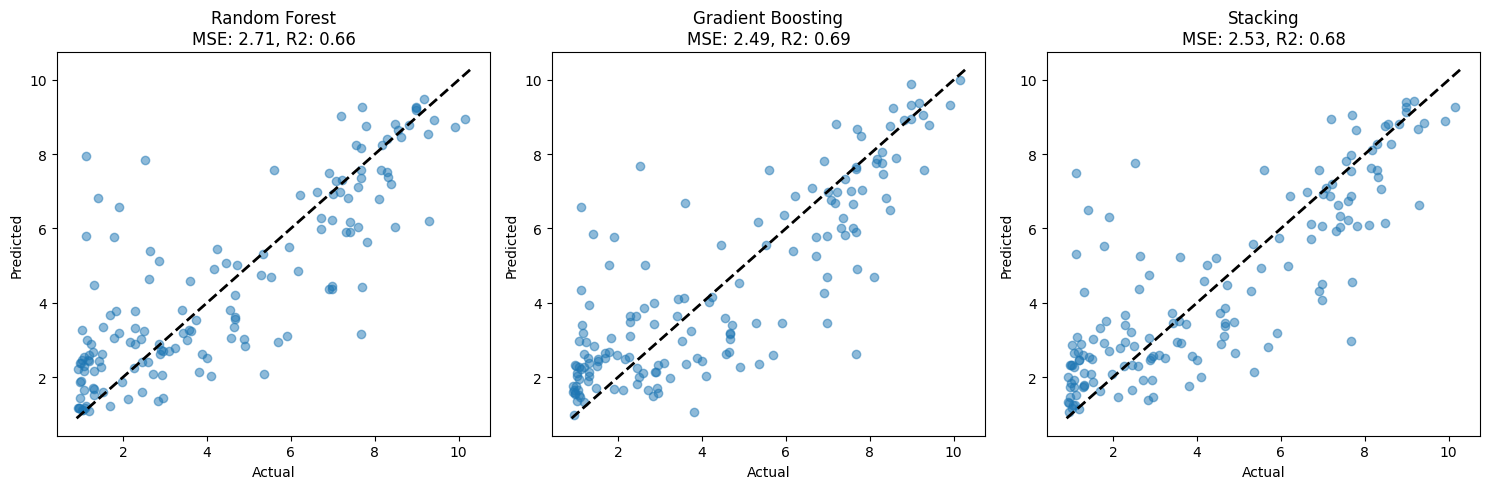

In [227]:
plt.figure(figsize=(15, 5))
for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(1, len(models), i)
    plt.scatter(RT_test, result['RT_pred'], alpha=0.5)
    plt.plot([RT.min(), RT.max()], [RT.min(), RT.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name}\nMSE: {result["mse"]:.2f}, R2: {result["r2"]:.2f}')
plt.tight_layout()
plt.show()

Рассмотрим каждую модель подробнее. Для каждого метода выведем пресказанное время задерижвание и разницу между реальным и предсказанным. 

In [277]:

current_index = np.arange(1, len(X_test.index)+1)
rf = results['Random Forest']['RT_pred']
gb = results['Gradient Boosting']['RT_pred']
stacking = results['Stacking']['RT_pred']

deltaRF = np.abs(rf - RT_test)
deltaGB = np.abs(gb-RT_test)
deltaStacking = np.abs(stacking-RT_test)
data = [current_index,X_test.index, RT_test, rf, gb, stacking, deltaRF, deltaGB, deltaStacking]



df = pd.DataFrame(data, index = ['Current Index','Actual Index', 'Actual RT', 'RandomForest RT', 'GradientBoosting RT','Stacking RT','Delta RF',
                                 'Delta GB', 'Delta Stacking'])
df = df.T
df.head()


,Current Index,Actual Index,Actual RT,RandomForest RT,GradientBoosting RT,Stacking RT,Delta RF,Delta GB,Delta Stacking
0,1.0,805.0,6.614467,6.972147,7.099856,6.992293,0.357680,0.485389,0.377826
1,2.0,27.0,4.539500,3.814176,3.590539,3.720582,0.725324,0.948961,0.818918
2,3.0,77.0,1.072817,2.554515,2.969239,2.662465,1.481698,1.896422,1.589648
3,4.0,608.0,0.968050,2.368775,2.318949,2.329251,1.400725,1.350899,1.361201
4,5.0,320.0,8.981033,9.245915,8.934934,9.128586,0.264882,0.046099,0.147553


Построим зависимости. Для каждого метода расчитаем процент попадания в диапазон [0,1]. Попадание времени в этот диапазон говорит о том, что RT было предсказано довольно точно. 
Видно, что даже без учёта 3D-дескрипторов и с небольшой выборкой исходных 2D-дескрипторов, предсказание идёт больше чем на 50%

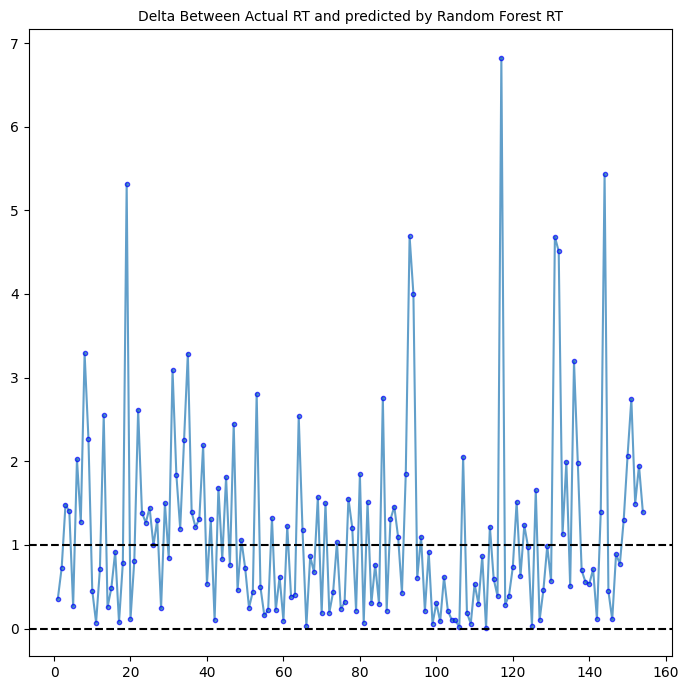

Количество индексов в диапазоне: 86
Процент индексов в диапазоне: 55.84%


In [ ]:
plt.figure(figsize=(7,7))
plt.plot(df['Current Index'], df['Delta RF'], marker = 'o', markersize = 3, alpha = 0.7, mec = 'blue')

plt.axhline(y=0, c='black', ls = '--', lw = 1.5)
plt.axhline(y=1, c='black', ls = '--', lw = 1.5)

plt.title("Delta Between Actual RT and RT predicted by Random Forest", size =10)
plt.tight_layout()
plt.show()

count = df['Delta RF'].between(0, 1, inclusive='both').sum()
total = len(df['Delta RF'])
percent = (count / total) * 100

print(f"Количество индексов в диапазоне: {count}")
print(f"Процент индексов в диапазоне: {percent:.2f}%")




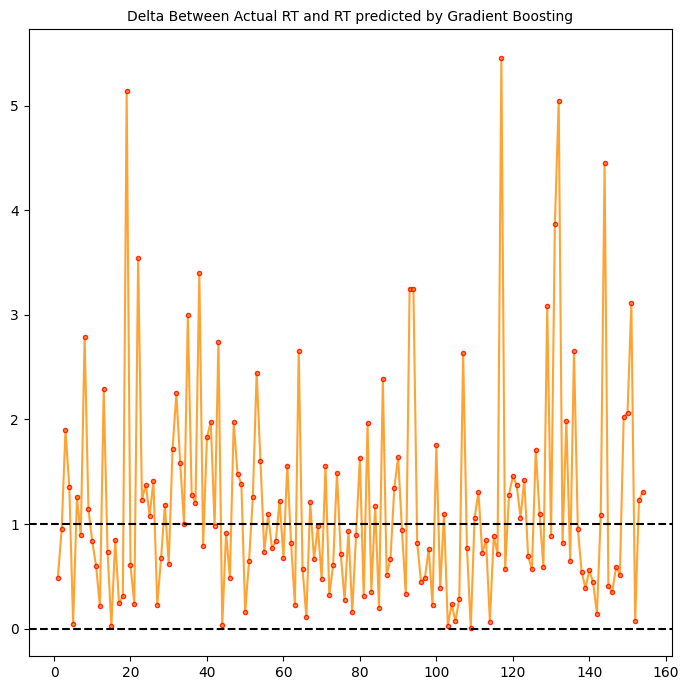

Количество индексов в диапазоне: 84
Процент индексов в диапазоне: 54.55%


In [271]:
plt.figure(figsize=(7,7))
plt.plot(df['Current Index'], df['Delta GB'], marker = 'o', markersize = 3, mec = 'red', c = 'darkorange', alpha = 0.8)

plt.axhline(y=0, c='black', ls = '--', lw = 1.5)
plt.axhline(y=1, c='black', ls = '--', lw = 1.5)

plt.title("Delta Between Actual RT and RT predicted by Gradient Boosting", size =10)
plt.tight_layout()
plt.show()

count = df['Delta GB'].between(0, 1, inclusive='both').sum()
total = len(df['Delta GB'])
percent = (count / total) * 100

print(f"Количество индексов в диапазоне: {count}")
print(f"Процент индексов в диапазоне: {percent:.2f}%")

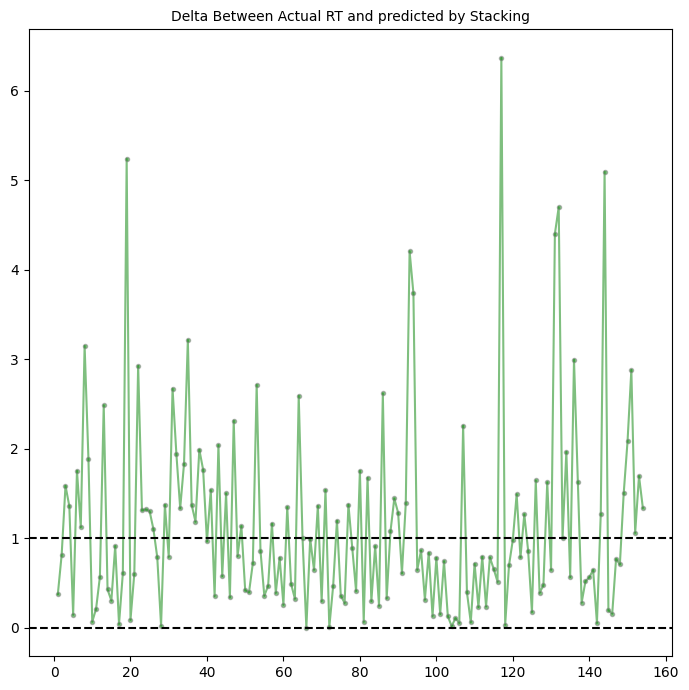

Количество индексов в диапазоне: 88
Процент индексов в диапазоне: 57.14%


In [276]:
plt.figure(figsize=(7,7))
plt.plot(df['Current Index'], df['Delta Stacking'], marker = 'o', markersize = 3, mec = 'grey', c = 'green', alpha = 0.5)

plt.axhline(y=0, c='black', ls = '--', lw = 1.5)
plt.axhline(y=1, c='black', ls = '--', lw = 1.5)

plt.title("Delta Between Actual RT and predicted by Stacking", size =10)
plt.tight_layout()
plt.show()

count = df['Delta Stacking'].between(0, 1, inclusive='both').sum()
total = len(df['Delta Stacking'])
percent = (count / total) * 100

print(f"Количество индексов в диапазоне: {count}")
print(f"Процент индексов в диапазоне: {percent:.2f}%")